In [13]:
%pip install pandas
%pip install -U matplotlib
%pip install seaborn
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
     --------------------------------------- 11.0/11.0 MB 46.7 MB/s eta 0:00:00
     --------------------------------------- 46.2/46.2 MB 36.4 MB/s eta 0:00:00
     ---------------------------------------- 301.8/301.8 kB ? eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [2]:
# Load the JSON data
with open('C:\\Users\\miliBUB\\OneDrive\\Skrivebord\\masters_thesis_spotify\\enriched_playlist.json', 'r') as f:
    data = json.load(f)

In [3]:
# Extract playlists and track features
playlists = data['playlists']
track_features = []


In [4]:
# Loop through playlists to extract track features
for playlist in playlists:
    for track in playlist['tracks']:
        if 'audio_features' in track:  # Check if audio_features key exists
            track_info = {
                'playlist_id': playlist['pid'],
                'track_id': track['track_uri'].split(':')[-1],
                'track_name': track['track_name'],
                'danceability': track['audio_features'].get('danceability', None),
                'energy': track['audio_features'].get('energy', None),
                'key': track['audio_features'].get('key', None),
                'loudness': track['audio_features'].get('loudness', None),
                'mode': track['audio_features'].get('mode', None),
                'speechiness': track['audio_features'].get('speechiness', None),
                'acousticness': track['audio_features'].get('acousticness', None),
                'instrumentalness': track['audio_features'].get('instrumentalness', None),
                'liveness': track['audio_features'].get('liveness', None),
                'valence': track['audio_features'].get('valence', None),
                'tempo': track['audio_features'].get('tempo', None)
                
            }
            track_features.append(track_info)

# Create a DataFrame from the track features
df_tracks = pd.DataFrame(track_features)

In [5]:
print(df_tracks.head())

   playlist_id                track_id                     track_name  \
0          151  37eC6DX0aYrFGw8cMQaBG5  Don't You Worry 'Bout A Thing   
1          151  142vj1HAI7VBAsn7OPmSHc                  Crazy For You   
2          151  5TAf4lnZCZTLlZHNZMLFLi                          I Try   
3          151  4bJbSERtCqK9D6DRUPMmMh          A Love That Will Last   
4          151  62YwtIlJIhRvFG7ChOCZSC                        If I Go   

   danceability  energy  key  loudness  mode  speechiness  acousticness  \
0         0.714   0.726   11    -9.218     1       0.0408        0.0316   
1         0.705   0.144    7   -12.234     1       0.0504        0.9260   
2         0.593   0.642    2    -7.284     1       0.0299        0.3130   
3         0.666   0.303   11   -11.028     0       0.0356        0.8410   
4         0.538   0.788    7    -4.122     0       0.0473        0.0106   

   instrumentalness  liveness  valence    tempo  
0          0.000000    0.0666    0.920  124.715  
1         

In [6]:
print(df_tracks.describe())

        playlist_id  danceability        energy           key      loudness  \
count  1.020120e+06  1.020120e+06  1.020120e+06  1.020120e+06  1.020120e+06   
mean   4.949506e+05  5.555361e-01  4.800764e-01  5.041395e+00 -1.053208e+01   
std    2.894423e+05  1.590818e-01  2.454108e-01  3.545693e+00  4.807015e+00   
min    1.510000e+02  0.000000e+00  0.000000e+00  0.000000e+00 -6.000000e+01   
25%    2.457880e+05  4.510000e-01  2.840000e-01  2.000000e+00 -1.319300e+01   
50%    4.867090e+05  5.650000e-01  4.750000e-01  5.000000e+00 -9.754500e+00   
75%    7.477030e+05  6.660000e-01  6.770000e-01  8.000000e+00 -7.031000e+00   
max    9.999050e+05  9.910000e-01  1.000000e+00  1.100000e+01  4.111000e+00   

               mode   speechiness  acousticness  instrumentalness  \
count  1.020120e+06  1.020120e+06  1.020120e+06      1.020120e+06   
mean   6.767096e-01  6.437435e-02  4.856984e-01      1.323327e-01   
std    4.677328e-01  6.932985e-02  3.432283e-01      2.785428e-01   
min    0.000

In [7]:
print(df_tracks.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020120 entries, 0 to 1020119
Data columns (total 14 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   playlist_id       1020120 non-null  int64  
 1   track_id          1020120 non-null  object 
 2   track_name        1020120 non-null  object 
 3   danceability      1020120 non-null  float64
 4   energy            1020120 non-null  float64
 5   key               1020120 non-null  int64  
 6   loudness          1020120 non-null  float64
 7   mode              1020120 non-null  int64  
 8   speechiness       1020120 non-null  float64
 9   acousticness      1020120 non-null  float64
 10  instrumentalness  1020120 non-null  float64
 11  liveness          1020120 non-null  float64
 12  valence           1020120 non-null  float64
 13  tempo             1020120 non-null  float64
dtypes: float64(9), int64(3), object(2)
memory usage: 109.0+ MB
None


In [8]:
# Group by playlist and calculate descriptive statistics
playlist_stats = df_tracks.groupby('playlist_id').agg({
    'danceability': ['mean', 'std'],
    'energy': ['mean', 'std'],
    'valence': ['mean', 'std'],
    'tempo': ['mean', 'std'],
    'loudness': ['mean', 'std'],
    'speechiness': ['mean', 'std'],
    'acousticness': ['mean', 'std'],
    'instrumentalness': ['mean', 'std'],
    'liveness': ['mean', 'std']
}).reset_index()

print(playlist_stats)

      playlist_id danceability              energy             valence  \
                          mean       std      mean       std      mean   
0             151     0.539262  0.149468  0.347257  0.212894  0.444279   
1             224     0.542122  0.169442  0.516961  0.206104  0.403854   
2             352     0.594750  0.145679  0.332807  0.219235  0.467554   
3             402     0.496109  0.093787  0.362373  0.225466  0.451111   
4             432     0.641083  0.158997  0.590857  0.198330  0.535376   
...           ...          ...       ...       ...       ...       ...   
13531      999680     0.512772  0.162832  0.333333  0.210331  0.562061   
13532      999742     0.544334  0.176652  0.406602  0.210914  0.398345   
13533      999822     0.531441  0.128216  0.349700  0.211247  0.432265   
13534      999868     0.584573  0.161685  0.500182  0.206324  0.672828   
13535      999905     0.616567  0.157162  0.275553  0.186402  0.567467   

                      tempo          

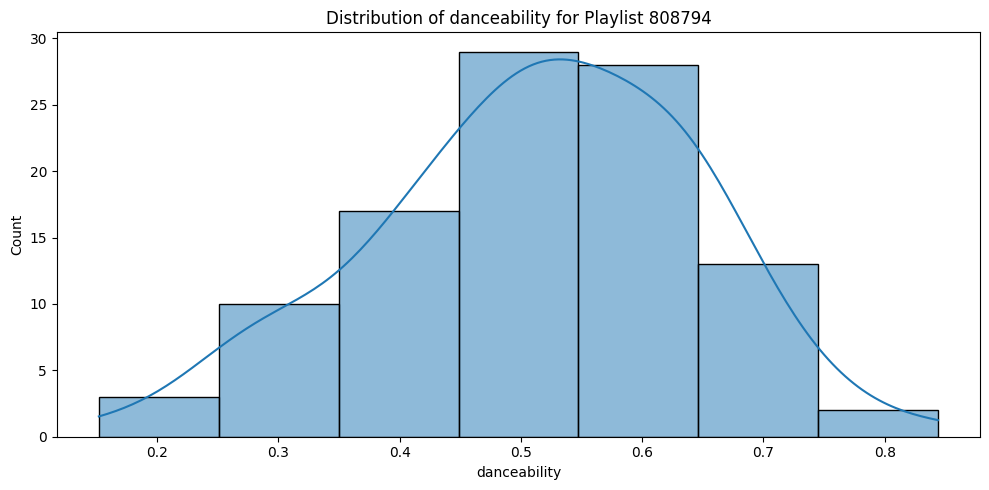

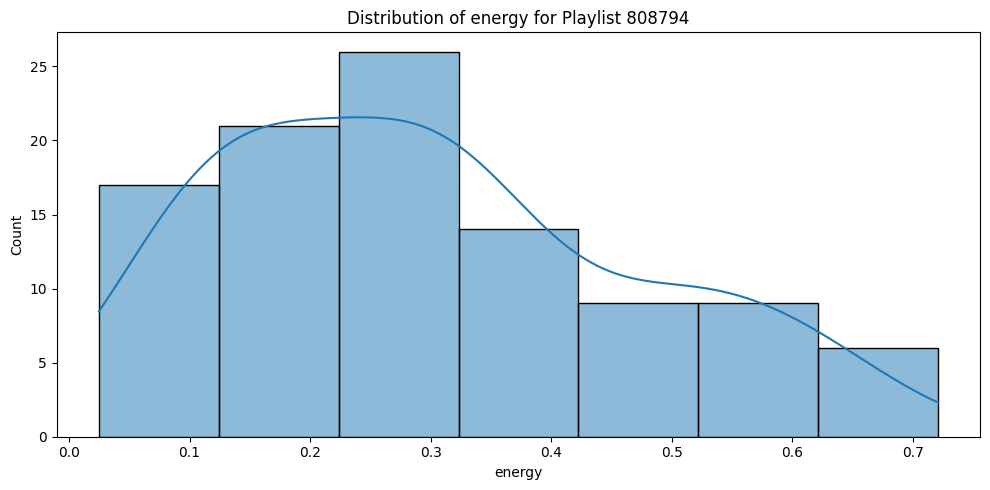

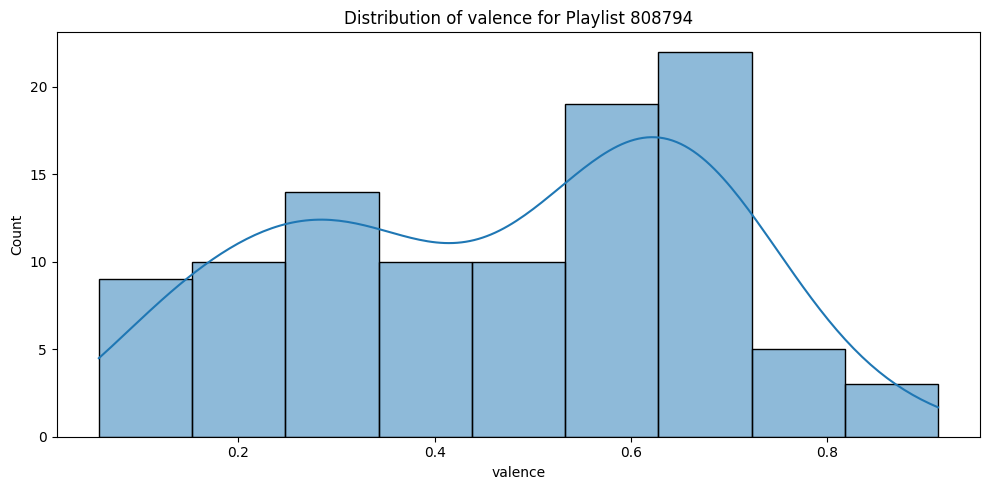

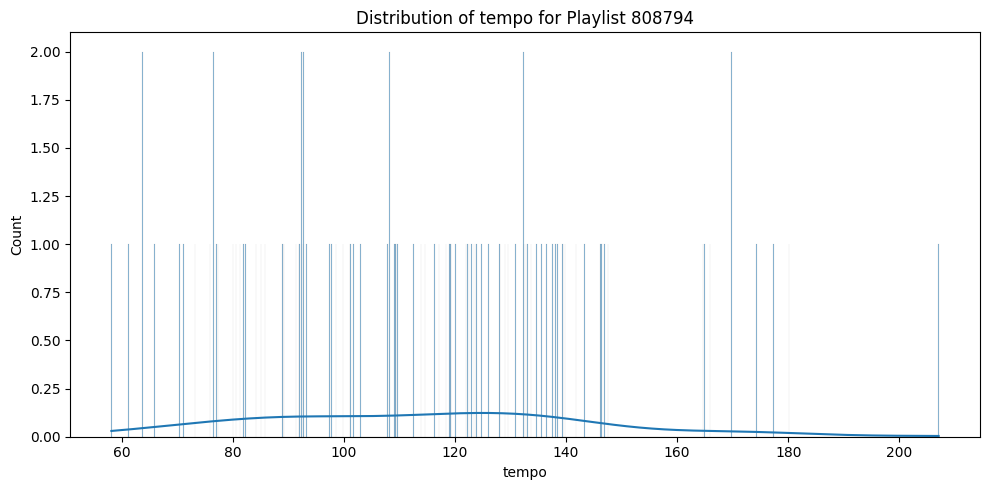

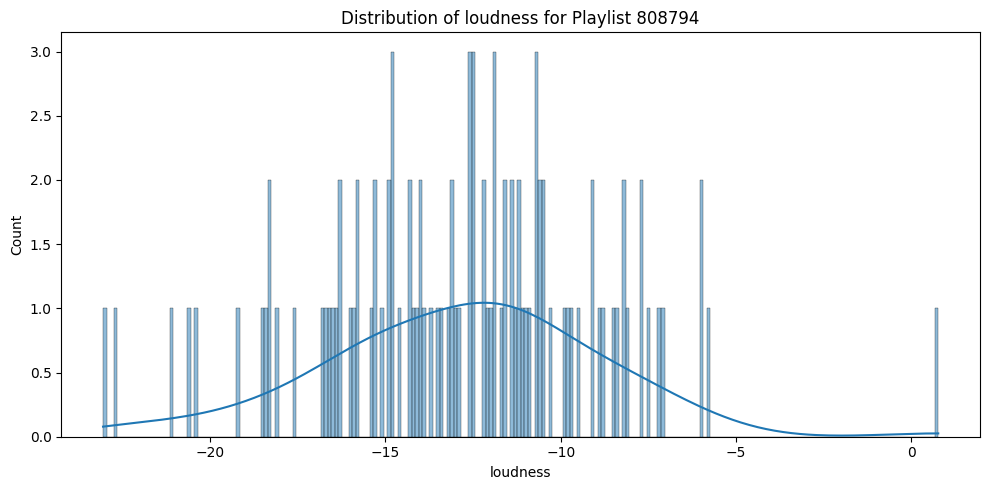

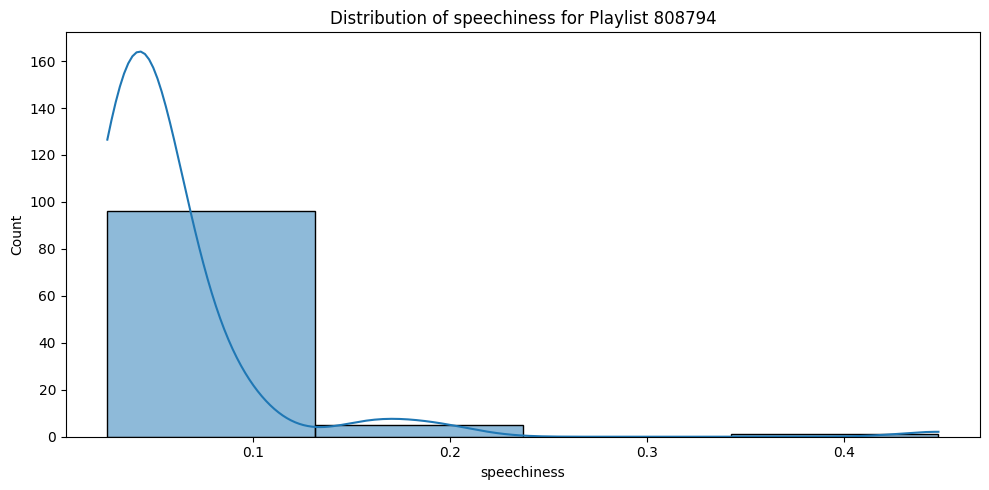

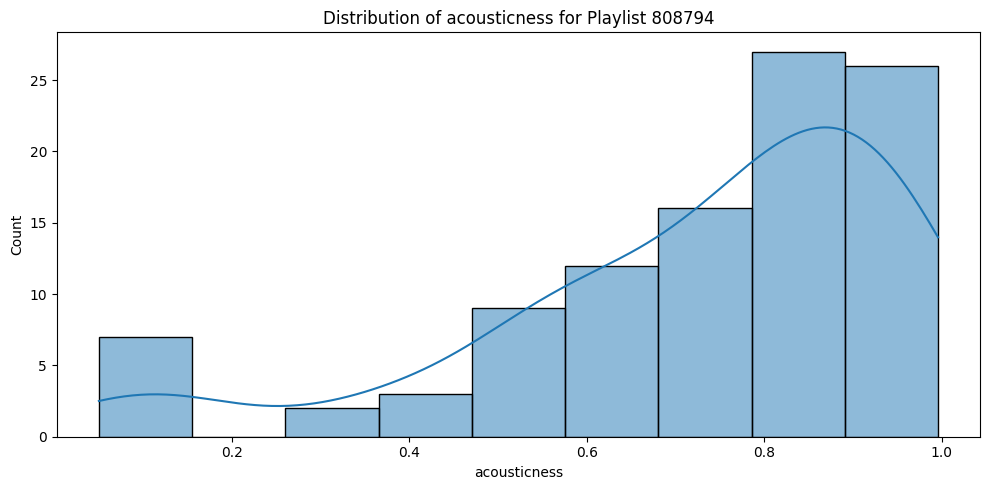

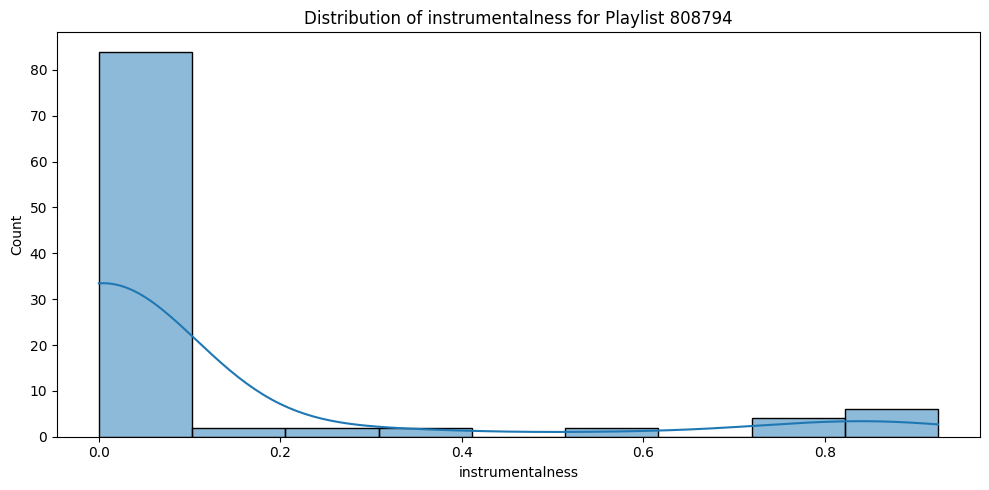

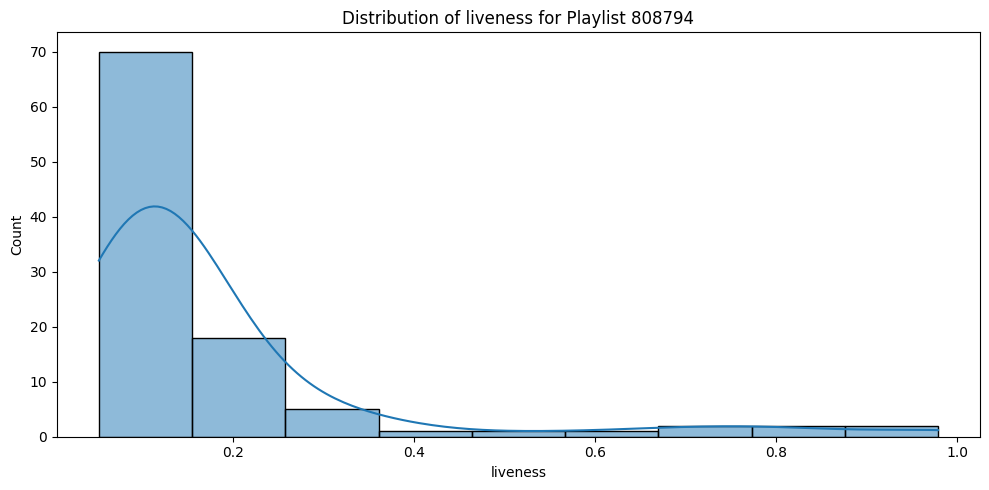

In [9]:
#Because of the data size, i will plot only a sample
playlist_id_sample = df_tracks['playlist_id'].sample(n=1, random_state=42).iloc[0]
df_sampled = df_tracks[df_tracks['playlist_id'] == playlist_id_sample]

# Define the features to plot
features = ['danceability', 'energy', 'valence', 'tempo', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness']

# Plot each feature individually using the sampled data
for feature in features:
    try:
        plt.figure(figsize=(10, 5))
        sns.histplot(data=df_sampled, x=feature, kde=True, binwidth=0.1)
        plt.title(f'Distribution of {feature} for Playlist {playlist_id_sample}')
        plt.tight_layout()
        plt.show()
    except ValueError as e:
        print(f"Could not plot {feature} due to: {e}")

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [17]:
# Prepare features and labels
X = df_tracks[['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
               'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']]
y = df_tracks['playlist_id']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
# Initialize the model
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
clf.fit(X_train, y_train)

MemoryError: could not allocate 28387049472 bytes